## 线性回归

#### 线性回归

训练集和测试集的准确率相差较大, 说明出现了**过拟合**

In [2]:


import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.61


#### 岭回归

岭回归也是一种用于回归的线性模型，因此它的预测公式与普通最小二乘法相同。但在岭 回归中，对系数(w)的选择不仅要在训练数据上得到好的预测结果，而且还要拟合附加 约束。我们还希望系数尽量小

**正则化**

如果有足够多的训练数据，正则化变得 不那么重要，并且岭回归和线性回归将具有相同的性能

In [4]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [5]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Ridge 在训练集上的分数要低于 LinearRegression，但在测试集上的分数更高。 这和我们的预期一致。线性回归对数据存在过拟合。Ridge 是一种约束更强的模型，所以 更不容易过拟合

增大 alpha 会使得系数更加趋向于 0，从而降低训练集性能， 但可能会提高泛化性能

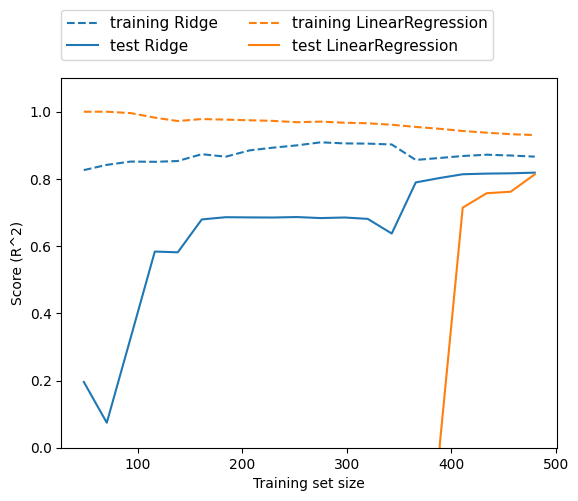

In [7]:
# 学习曲线
mglearn.plots.plot_ridge_n_samples()

#### 分类模型: 线性回归 && 线性支持向量机


/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


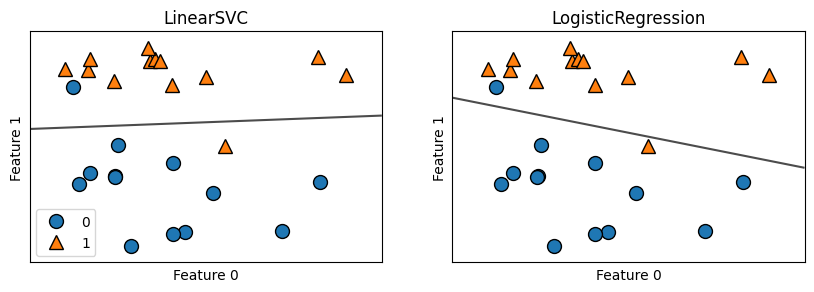

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import mglearn

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()

#### 多分类线性模型

对每个类别都学习一个二分类模型，将这个类别与所有其 他类别尽量分开，这样就生成了与类别个数一样多的二分类模型


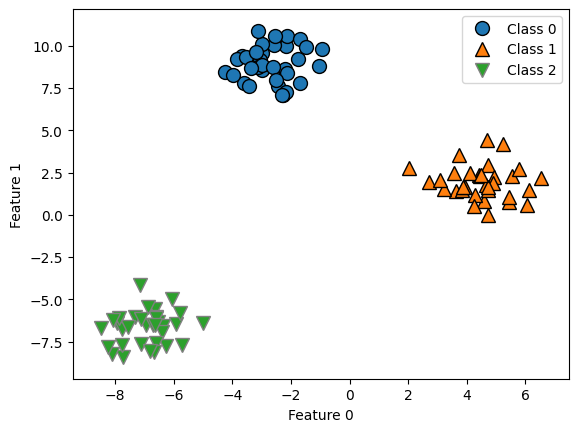

In [3]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [4]:
# 在以上数据集上训练一个SVC分类器

from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


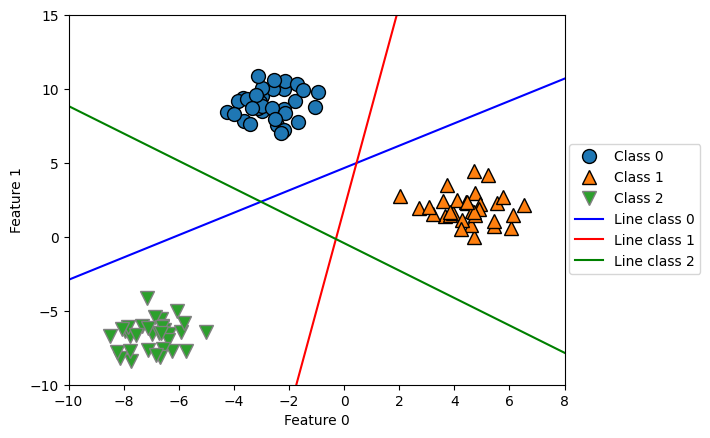

In [5]:
import numpy as np

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                       ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)

plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))